In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [64]:
# Construct the file path
#file_path = os.path.join(rpath, 'data', 'raw_news_data','raw_analyst_ratings.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/drive/My Drive/10Academy/raw_analyst_ratings.csv/raw_analyst_ratings.csv")
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [65]:
data = data[['date','headline','url','publisher','stock']]
data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [7]:
data.isnull().sum()

,0
date,0
headline,0
url,0
publisher,0
stock,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1407328 non-null  object
 1   headline   1407328 non-null  object
 2   url        1407328 non-null  object
 3   publisher  1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


**Sentiment Analysis**

In [9]:
sentiment_data=data.copy()

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sia = SentimentIntensityAnalyzer()

In [ ]:
# Descriptive statistics for headline length
headline_stats = data['headline_length'].describe()
article_count_by_publisher = data['publisher'].value_counts()
print(headline_stats)
print(article_count_by_publisher)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [14]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [17]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
sentiment_data

,date,headline,url,publisher,stock,sentiment,sentiment_category
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.0000,Neutral
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0000,Neutral
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.0000,Neutral
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.0000,Neutral
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.2960,Neutral
...,...,...,...,...,...,...,...
1407323,2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,0.2023,Neutral
1407324,2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,-0.3818,Negative
1407325,2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,0.0000,Neutral
1407326,2011-06-21 00:00:00,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX,0.0000,Neutral


In [35]:
sentiment_distribution = sentiment_data['sentiment_category'].value_counts()
sentiment_distribution

,count
sentiment_category,
Neutral,1070915
Negative,182864
Positive,109718
Very Negative,43831


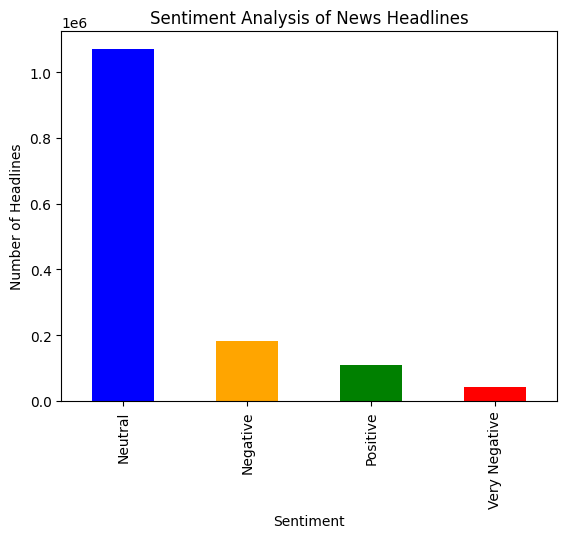

In [41]:
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar', color=['blue', 'orange','green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of News Headlines')
plt.show()

In [32]:
sentiment_data['stock'].unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

In [20]:
apple_data['sentiment_category'].value_counts()

,count
sentiment_category,
Neutral,298
Negative,74
Positive,43
Very Negative,26


In [34]:
# List of specific stocks to analyze
selected_stocks = ['AAPL', 'NVDA', 'META', 'AMZN', 'GOOG', 'TSLA', 'MSFT']
filtered_data = sentiment_data[sentiment_data['stock'].isin(selected_stocks)]
sentiment_by_publisher = filtered_data.groupby('stock')['sentiment_category'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)


sentiment_category  Very Negative  Negative  Neutral  Positive
stock                                                         
AAPL                           26        74      298        43
AMZN                           11        38      201        28
GOOG                           50       169      840       140
NVDA                          103       369     2393       281
TSLA                           64       221     1418       172


In [27]:
# Analyze sentiment by publisher
sentiment_by_publisher = sentiment_data.groupby('publisher')['sentiment_category'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)

sentiment_category          Very Negative  Negative  Neutral  Positive
publisher                                                             
47ertrends                              0         0       18         0
AARP                                    0         0        7         0
ABNNewswire                             0         4        9         0
Aakin                                   0         0        5         0
Aaron Jackson.Ed                        0         1       10         5
...                                   ...       ...      ...       ...
vic@forextraininggroup.com              0         0        1         0
vishwanath@benzinga.com                 1       856      939        34
vivek.proactive@gmail.com               0        45       74         1
wallstreet1928                          0         1        7         0
webmaster                             554      2894    15763      1102

[1034 rows x 4 columns]


**Time Series Analysis**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

time_series_data = data.copy()
time_series_data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [79]:
time_series_data['date'] = pd.to_datetime(time_series_data['date'], format='ISO8601', errors='coerce')
time_series_data['date_only'] = time_series_data['date'].dt.date
time_series_data['hour'] = time_series_data['date'].dt.hour
#time_series_time_series_data = time_series_data.set_index('date_only').sort_index()
time_series_data.head()


,date,headline,url,publisher,stock,date_only,hour
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,2020-06-05,10.0
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,2020-06-03,10.0
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,2020-05-26,4.0
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,2020-05-22,12.0
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,2020-05-22,11.0


In [80]:
articles_per_day = time_series_data['date'].value_counts().sort_index()
print(articles_per_day)

date
2020-05-22 08:06:17-04:00     2
2020-05-22 08:37:59-04:00     1
2020-05-22 09:07:04-04:00     1
2020-05-22 09:36:20-04:00     1
2020-05-22 11:23:25-04:00     1
2020-05-22 11:38:59-04:00     1
2020-05-22 12:45:06-04:00    19
2020-05-26 04:30:07-04:00    28
2020-06-03 10:45:20-04:00    56
2020-06-05 10:30:54-04:00    62
Name: count, dtype: int64


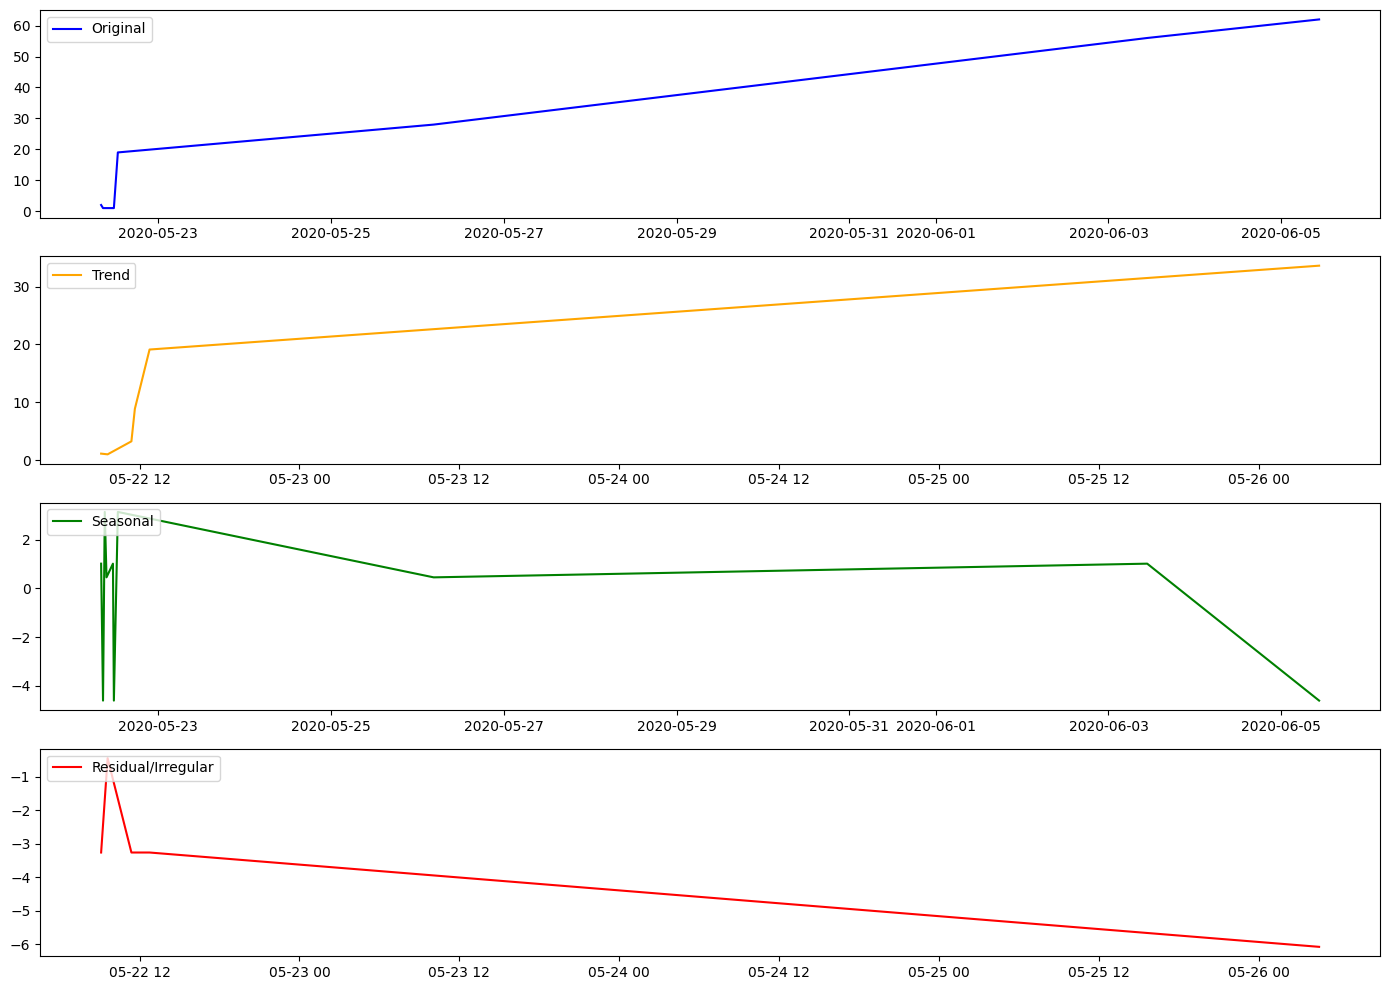

In [82]:
decomposition = seasonal_decompose(articles_per_day, model='additive', period=4)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(articles_per_day, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [84]:
# Count the number of articles published at each hour
articles_per_hour = time_series_data['hour'].value_counts().sort_index()
# Display the distribution
print(articles_per_hour)

hour
4.0      28
8.0       3
9.0       2
10.0    118
11.0      2
12.0     19
Name: count, dtype: int64


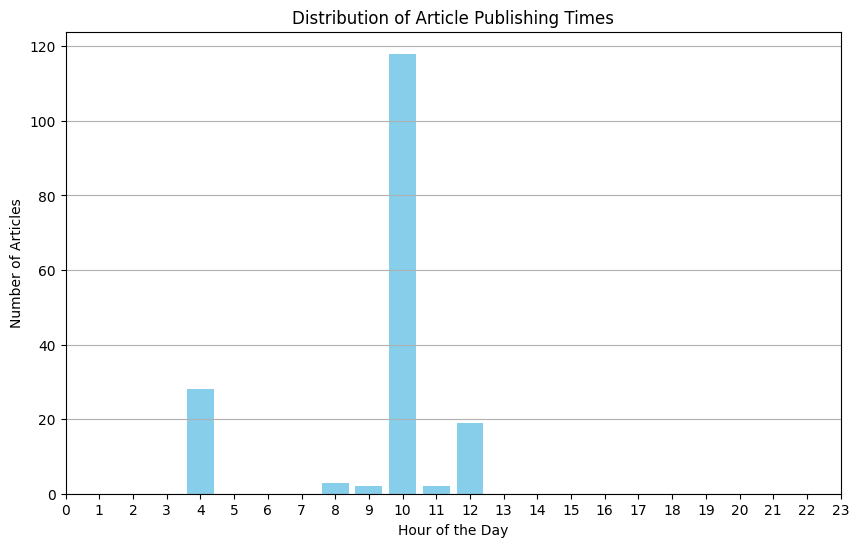

In [85]:
# Count the number of articles published at each hour
articles_per_hour = time_series_data['hour'].value_counts().sort_index()
# Display the distribution
print(articles_per_hour)
# Plot the number of articles published at each hour
plt.figure(figsize=(10, 6))
plt.bar(articles_per_hour.index, articles_per_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Publishing Times')
plt.xticks(range(24))  # Ensure all 24 hours are shown
plt.grid(axis='y')
plt.show()

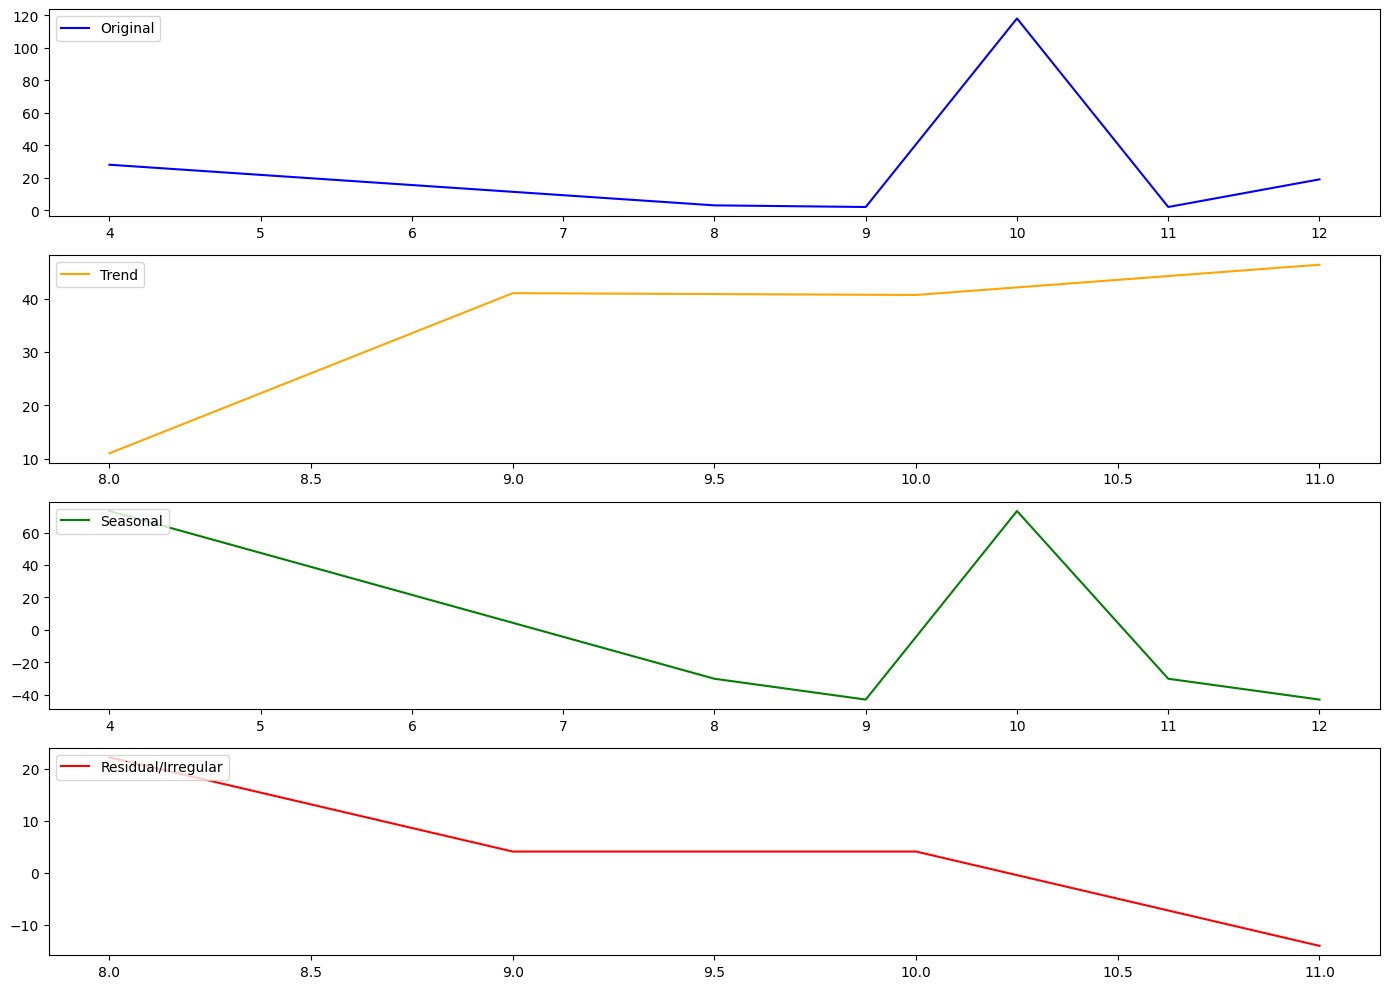

In [88]:
decomposition = seasonal_decompose(articles_per_hour, model='additive', period=3)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(articles_per_hour, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

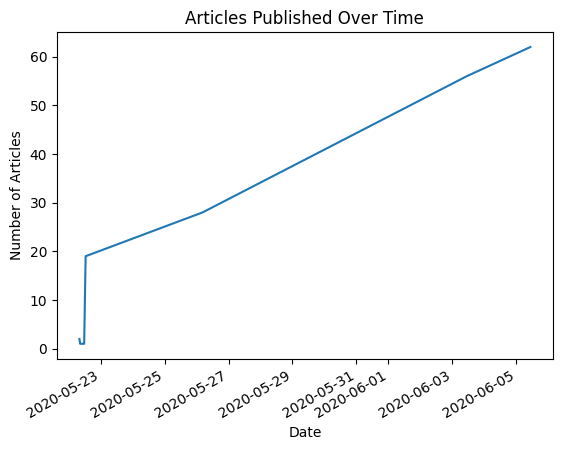

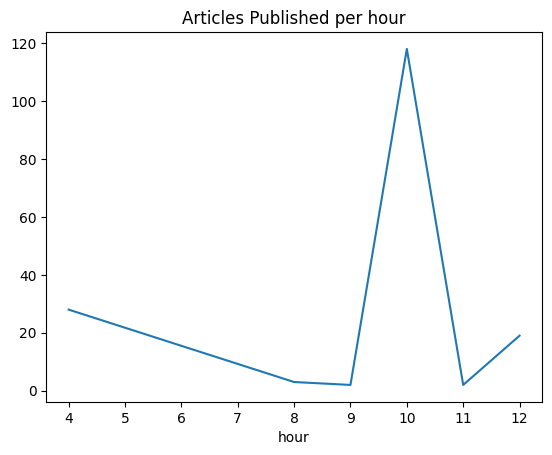

In [89]:
import matplotlib.pyplot as plt

# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()

# Optional: Plotting the trend over time
articles_per_day.plot(kind='line', title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


# Optional: Plotting the trend over time
articles_per_hour.plot(kind='line', title='Articles Published per hour')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()